In [1]:
from hashstash.profilers.serialize_profiler import *
compare_serializers(1, num_proc=1)
# stash = compare_serializers.stash
# # stash.clear()
# df = stash.df
# # # df = df[~df.data_type.str.contains('prosodic')]
# df.sample(10)
# df['serializer_name'] = df['serializer_name'].apply(lambda x: 'hashstash' if x=='custom' else x)
# df = df[~df.data_type.str.contains('float')]
# df = df[~df.data_type.str.contains('bool')]
# df = df[~df.data_type.str.contains('None')]
# df = df[~df.data_type.str.contains('int')]

TypeError: 'NoneType' object cannot be interpreted as an integer

In [22]:
df.data_type.unique()


array(['pandas.core.series.Series', 'pandas.core.frame.DataFrame',
       'builtins.list', 'numpy.ndarray', 'builtins.dict', 'builtins.str'],
      dtype=object)

In [23]:
# df=pd.DataFrame([1,2,3,4])
# compare_serializers(df)

In [24]:
df.data_type.value_counts()

data_type
builtins.dict                  9336
builtins.list                  8712
numpy.ndarray                  7540
builtins.str                   4968
pandas.core.frame.DataFrame    4512
pandas.core.series.Series      4500
Name: count, dtype: int64

In [25]:
df=df[~df.encoding.isna()]
# df

In [26]:
pd.options.display.max_rows=None

def summarize_by_group(df, group_by=['data_type','serializer_name'], sort_by=['deserialize_speed']):
    df = df.copy()
    df['data_type'] = df['data_type'].apply(lambda x: x.split('.')[-1] if x.split('.')[0]=='builtins' else x)
    dfgrp = df.groupby(group_by).sum(numeric_only=True)
    dfgrp['serialize_speed'] = dfgrp['input_size_mb'] / dfgrp['serialize_time']
    dfgrp['deserialize_speed'] = dfgrp['input_size_mb'] / dfgrp['deserialize_time']
    dfgrp['encode_speed'] = dfgrp['input_size_mb'] / dfgrp['encode_time']
    dfgrp['decode_speed'] = dfgrp['input_size_mb'] / dfgrp['decode_time']
    dfgrp['encode_serialize_speed'] = dfgrp['input_size_mb'] / dfgrp['encode_serialize_time']
    dfgrp['decode_deserialize_speed'] = dfgrp['input_size_mb'] / dfgrp['decode_deserialize_time']
    dfgrp['encode_decode_serialize_deserialize_speed'] = dfgrp['input_size_mb'] / (dfgrp['encode_serialize_time']+dfgrp['decode_deserialize_time'])
    return dfgrp.sort_values(sort_by, ascending=False)
    
odf=summarize_by_group(df, sort_by=['data_type','serialize_speed'])

In [27]:
summarize_by_group(df, group_by=['data_type'], sort_by='serialize_speed')


,serialize_speed,deserialize_speed,serialize_time,deserialize_time,encode_time,decode_time,encode_serialize_time,decode_deserialize_time,size_mb,input_size_mb,encode_speed,decode_speed,encode_serialize_speed,decode_deserialize_speed,encode_decode_serialize_deserialize_speed
data_type,,,,,,,,,,,,,,,
numpy.ndarray,128.746409,173.736873,74.291729,55.053329,237.058924,24.529511,311.350653,79.582840,10322.941280,9564.793320,40.347746,389.930049,30.720325,120.186629,24.466549
dict,74.958491,50.907654,5.923869,8.722545,7.342381,1.069752,13.266250,9.792297,407.481243,444.044289,60.476877,415.090694,33.471725,45.346284,19.257253
list,72.851603,49.676816,1.060254,1.554874,1.058286,0.188894,2.118540,1.743768,71.412188,77.241211,72.987105,408.913953,36.459646,44.295578,19.998720
pandas.core.series.Series,40.949255,50.276050,1.696277,1.381598,0.673426,0.127221,2.369703,1.508818,47.728052,69.461266,103.146113,545.990577,29.312229,46.036870,17.909216
pandas.core.frame.DataFrame,36.176523,40.033811,27.162954,24.545783,15.268798,2.177276,42.431752,26.723059,836.044291,982.661247,64.357472,451.325913,23.158630,36.772034,14.209586
str,2.397303,4.463393,0.103533,0.055608,0.134117,0.005954,0.237650,0.061562,0.324430,0.248199,1.850614,41.685981,1.044390,4.031711,0.829510


In [28]:
summarize_by_group(df, group_by=['serializer_name'], sort_by='serialize_speed')

,serialize_speed,deserialize_speed,serialize_time,deserialize_time,encode_time,decode_time,encode_serialize_time,decode_deserialize_time,size_mb,input_size_mb,encode_speed,decode_speed,encode_serialize_speed,decode_deserialize_speed,encode_decode_serialize_deserialize_speed
serializer_name,,,,,,,,,,,,,,,
pickle,1738.286726,209.785514,1.352244,11.204722,28.816597,4.857990,30.168841,16.062712,1960.131730,2350.588451,81.570648,483.860335,77.914444,146.338206,50.843814
orjson,387.590458,134.307919,5.159779,14.890268,107.897601,6.442772,113.057379,21.333040,3018.836093,1999.880947,18.534990,310.406914,17.689079,93.745707,14.881127
jsonpickle,187.849557,153.697758,10.646184,13.011777,39.193044,5.081328,49.839228,18.093105,2037.335562,1999.880947,51.026425,393.574490,40.126644,110.532769,29.439309
hashstash,146.851076,114.610227,16.006614,20.509413,45.394645,6.071791,61.401258,26.581204,2368.195226,2350.588451,51.781184,387.132624,38.282415,88.430474,26.716557
json,82.875471,139.448019,1.048830,0.623331,1.539545,0.222761,2.588375,0.846092,82.796594,86.922283,56.459729,390.204372,33.581799,102.733845,25.308814
jsonpickle_ext,30.918639,75.644314,76.024965,31.074225,38.694501,5.421967,114.719467,36.496192,2218.636279,2350.588451,60.747351,433.530607,20.489883,64.406403,15.544610


In [33]:
summarize_by_group(df, group_by=['data_type','serializer_name']).sort_index()#.sort_values('serialize_time')


serialize_speed  \
data_type                   serializer_name                    
dict                        hashstash              64.117811   
                            json                   80.950560   
                            jsonpickle             41.597512   
                            jsonpickle_ext         42.557592   
                            orjson                403.628195   
                            pickle                480.816645   
list                        hashstash              62.981169   
                            json                  100.614770   
                            jsonpickle             40.700468   
                            jsonpickle_ext         37.017411   
                            orjson                431.825976   
                            pickle                378.395470   
numpy.ndarray               hashstash             245.986367   
                            jsonpickle            224.544026   
                            jsonpickle_ext         36.301015   
                            orjson                387.113526   
                            pickle               5357.950034   
pandas.core.frame.DataFrame hashstash              49.851519   
                            jsonpickle_ext         16.469093   
                            pickle                465.691891   
pandas.core.series.Series   hashstash              77.945775   
                            jsonpickle_ext         17.807770   
                            pickle                233.824563   
str                         hashstash              11.340131   
                            json                    6.218781   
                            jsonpickle              1.315261   
                            jsonpickle_ext          0.797236   
                            orjson                  8.247956   
                            pickle                  8.478499   

                                             deserialize_speed  \
data_type                   serializer_name                      
dict                        hashstash                65.492699   
                            json                    142.004293   
                            jsonpickle               23.350806   
                            jsonpickle_ext           23.206573   
                            orjson                  204.200089   
                            pickle                  211.145084   
list                        hashstash                62.230336   
                            json                    135.358328   
                            jsonpickle               23.562367   
                            jsonpickle_ext           22.890127   
                            orjson                  176.601384   
                            pickle                  180.715156   
numpy.ndarray               hashstash               209.788662   
                            jsonpickle              206.053070   
                            jsonpickle_ext          145.620229   
                            orjson                  132.393352   
                            pickle                  211.019208   
pandas.core.frame.DataFrame hashstash                33.914567   
                            jsonpickle_ext           24.561467   
                            pickle                  211.120905   
pandas.core.series.Series   hashstash                59.735190   
                            jsonpickle_ext           27.780861   
                            pickle                  144.216838   
str                         hashstash                 5.031435   
                            json                      5.858455   
                            jsonpickle                3.382408   
                            jsonpickle_ext            2.492301   
                            orjson                    7.019906   
                            pickle                    7.380636   

             

In [34]:
# figdf = figdf[figdf.encoding=='raw']
# figdf = figdf[~figdf.data_type.str.contains('Series')]

# figdf = figdf[~figdf.data_type.str.contains('str')]
# figdf['encoding'] = figdf['encoding'].apply(lambda x: x.replace('compressed','zlib'))
# figdf

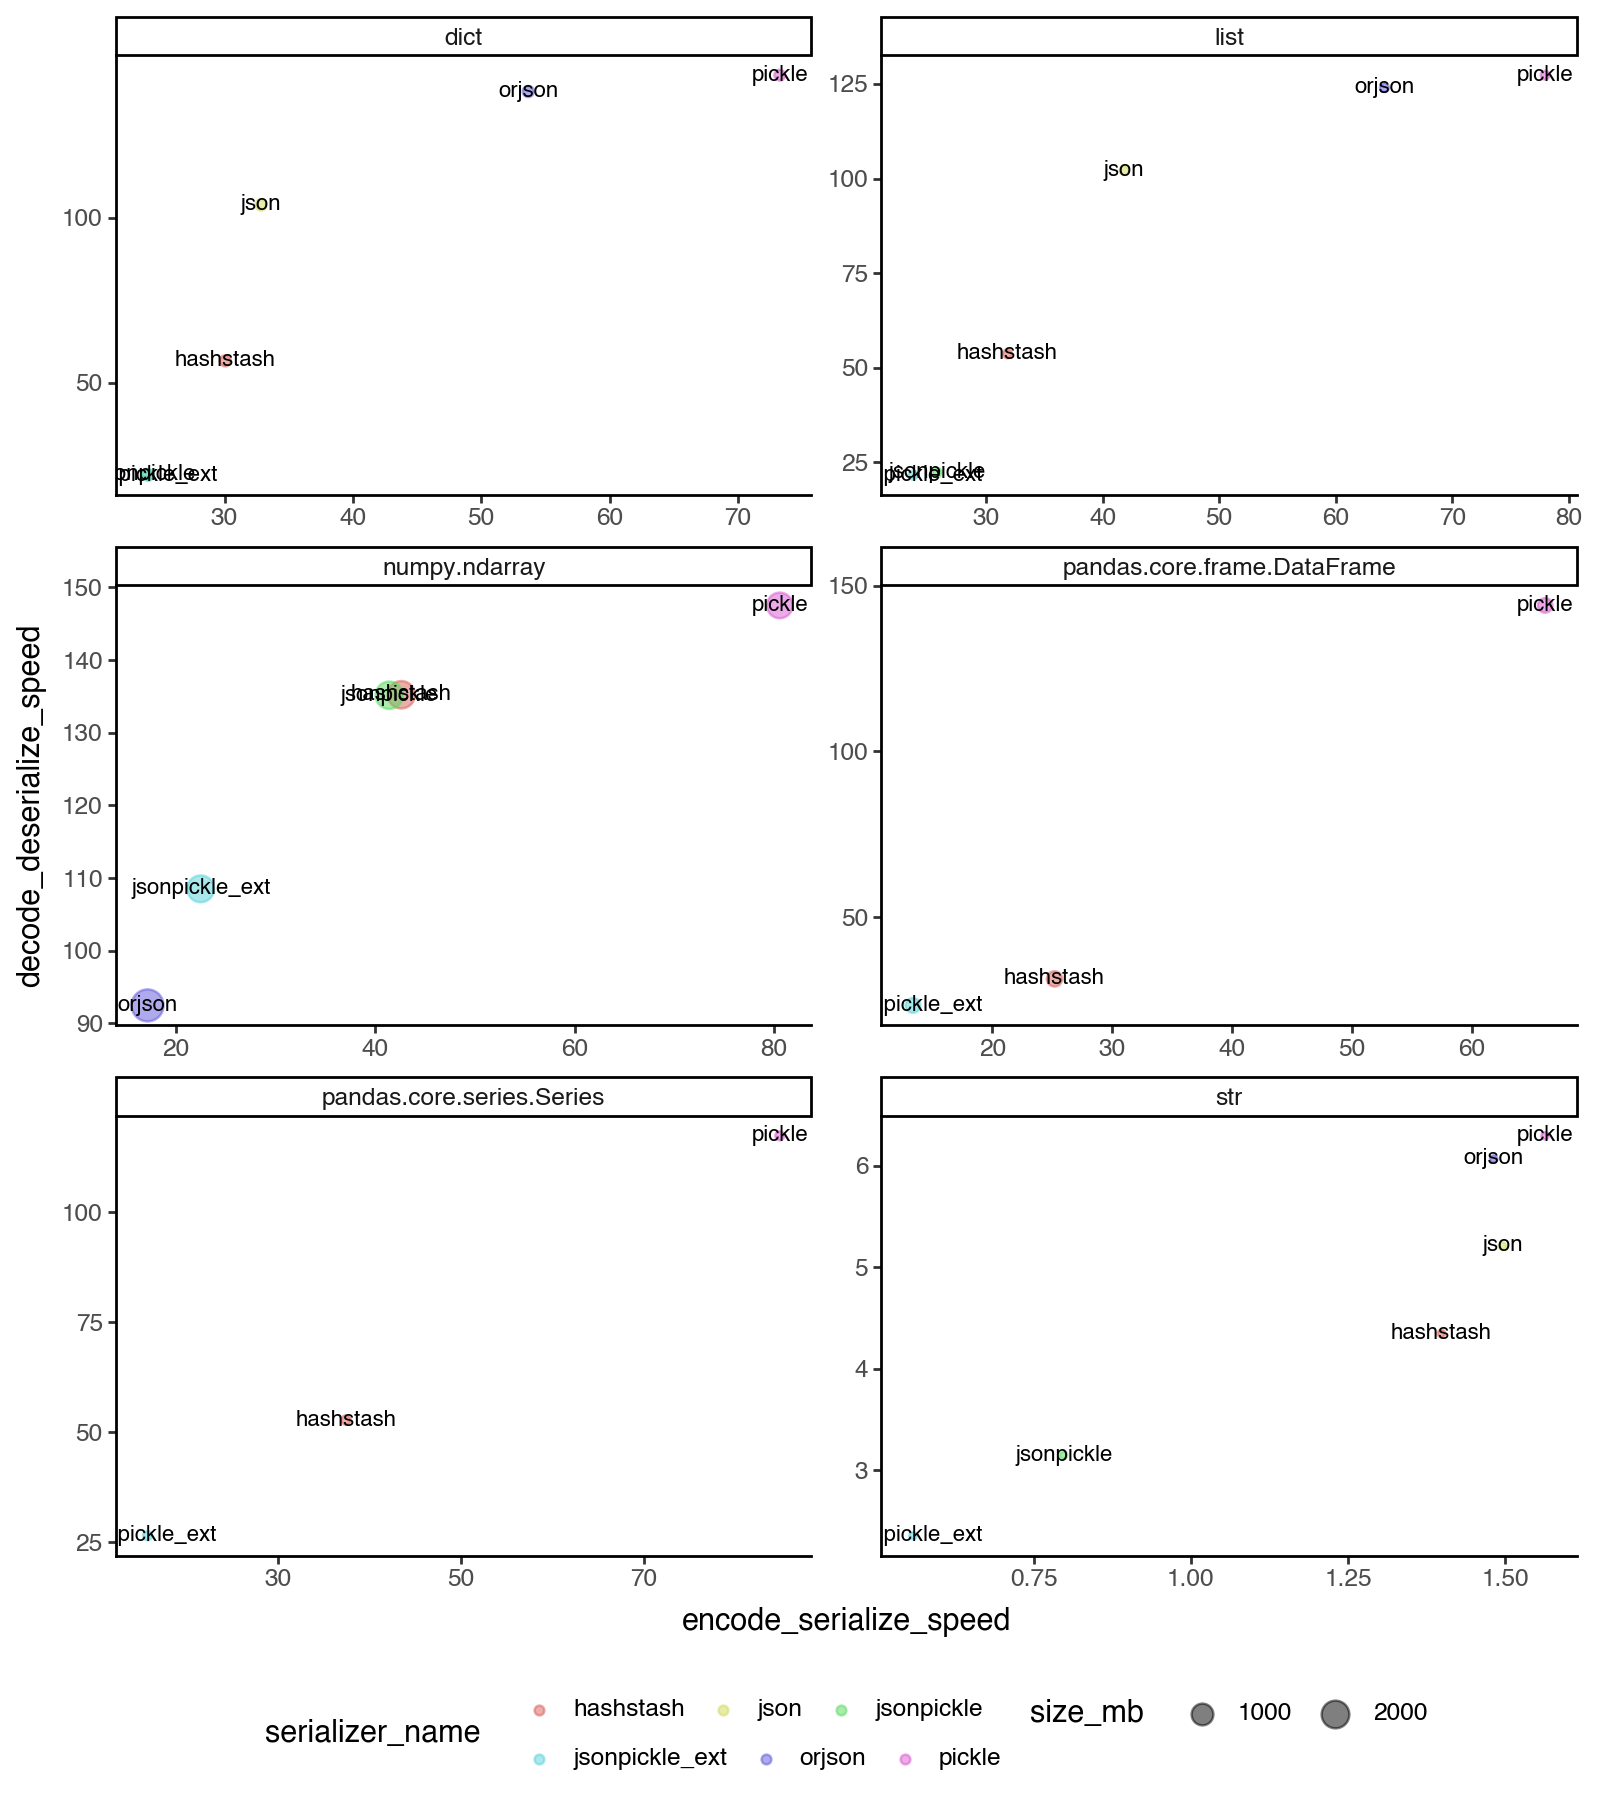

In [40]:
import plotnine as p9
p9.options.figure_size=(8,9)
figdf = summarize_by_group(df, group_by=['serializer_name','data_type']).reset_index()
fig = p9.ggplot(figdf, p9.aes(x='encode_serialize_speed', y='decode_deserialize_speed',label='serializer_name', color='serializer_name', size='size_mb'))
fig+=p9.geom_point(alpha=.5)
fig+=p9.geom_text(size=8,color='black')
# fig+=p9.scale_x_log10()
# fig+=p9.scale_y_log10()
fig+=p9.facet_wrap('data_type',ncol=2,scales='free')
fig+=p9.theme_classic()
fig += p9.theme(legend_position='bottom')
fig += p9.guides(color=p9.guide_legend(nrow=2, byrow=True))
fig

In [13]:
# df.encoding

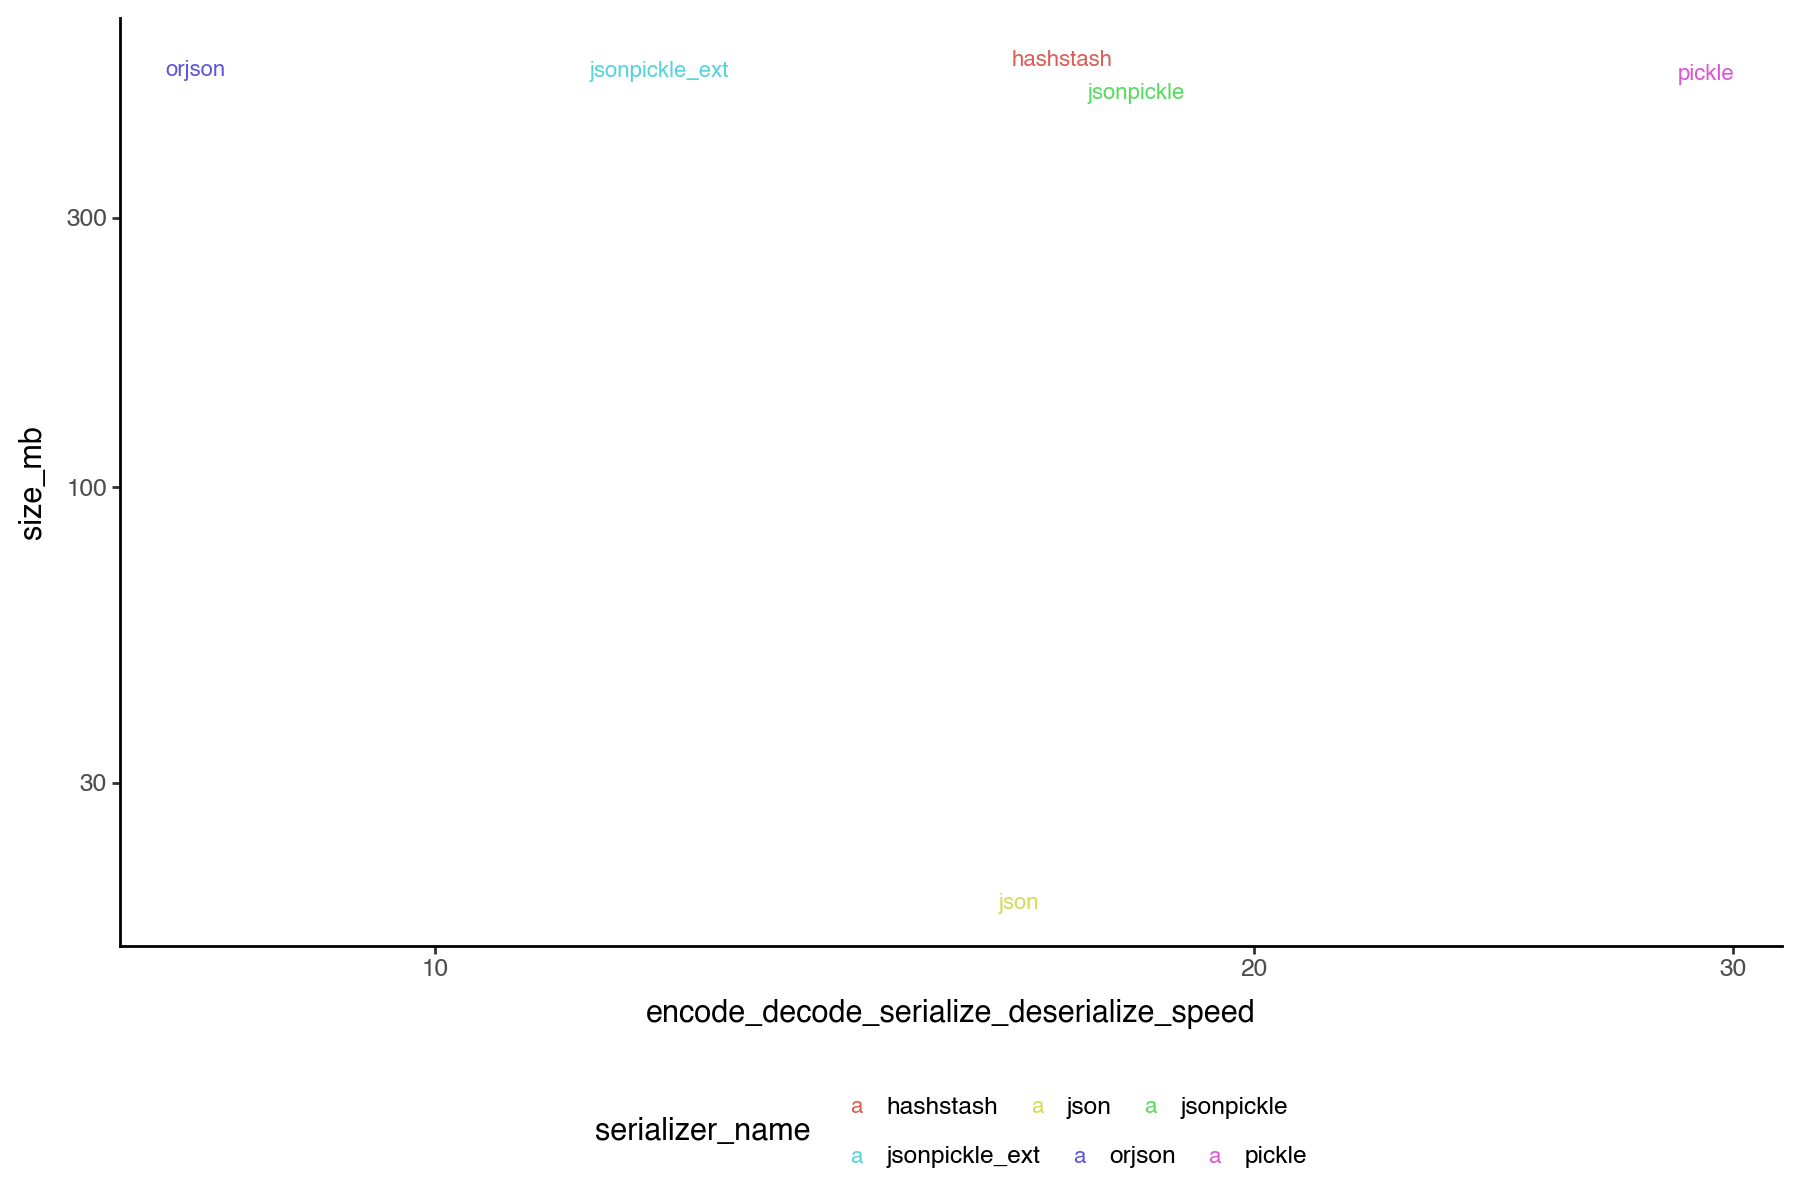

In [14]:
import plotnine as p9
p9.options.figure_size=(9,6)
figdf = summarize_by_group(df[df.encoding=='compressed.b64'], group_by=['serializer_name']).reset_index()
fig = p9.ggplot(figdf, p9.aes(x='encode_decode_serialize_deserialize_speed', y='size_mb', label='serializer_name', color='serializer_name'))
fig+=p9.geom_text(size=8)
fig+=p9.scale_x_log10()
fig+=p9.scale_y_log10()
# fig+=p9.facet_wrap('data_type',ncol=3)
fig+=p9.theme_classic()
fig += p9.theme(legend_position='bottom')
fig += p9.guides(color=p9.guide_legend(nrow=2, byrow=True))
fig